In [4]:
import numpy as np
import cv2
import requests
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [5]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)
    
    for c in range(1,C):
        parametres['W'+str(c)] = np.random.randn(dimensions[c],dimensions[c-1])
        parametres['b'+str(c)] = np.random.randn(dimensions[c],1)

    return parametres

In [6]:
def forward_propagation(X, parametres):

    activations = {'A0':X}
    C = len(parametres)//2
    
    for c in range(1,C+1):
        Z = parametres['W'+str(c)].dot(activations['A' +str(c-1)]) + parametres['b'+str(c)]
        activations['A'+str(c)] = 1 / (1+np.exp(-Z))
    
    return activations

In [7]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [8]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [9]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [10]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

In [33]:
#########################################################################################

In [34]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

Shape of the image (51341,)


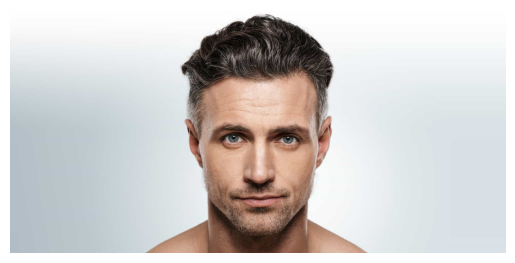

Shape of the image (30616,)


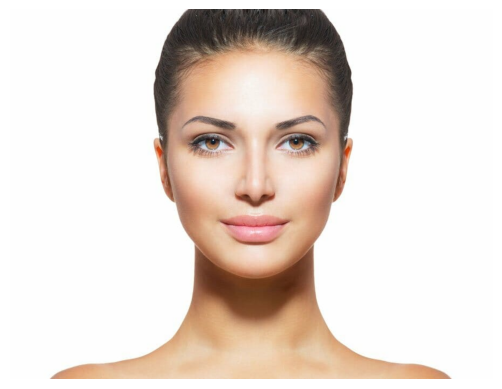

In [39]:
url_face = r'https://drsainthillier.com/wp-content/uploads/2020/11/visage-homme-chiffres-fond.jpg'
resp = requests.get(url_face, stream=True).raw

image_array_face = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_face.shape}')
image_face = cv2.imdecode(image_array_face, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()


url_face2 = r'https://medime.com/wp-content/uploads/2017/07/conditions-visage-femme.jpg'
resp = requests.get(url_face2, stream=True).raw
image_array_face2 = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_face2.shape}')
image_face2 = cv2.imdecode(image_array_face2, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_face2, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  000  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  000  255  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  

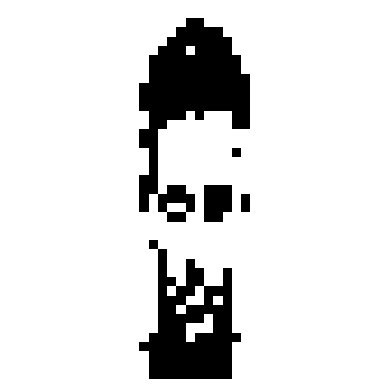

In [14]:
res = cv2.resize(image_face , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

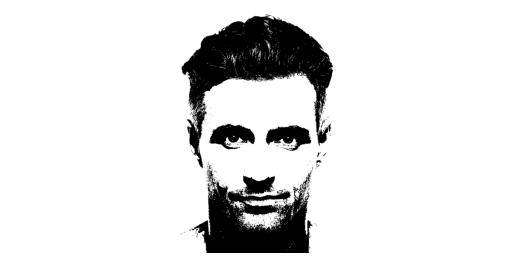

In [16]:
#Convert to bw
img_bw = cv2.imdecode(image_array_face, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[0 0 0]
 [0 1 0]
 [0 0 0]]


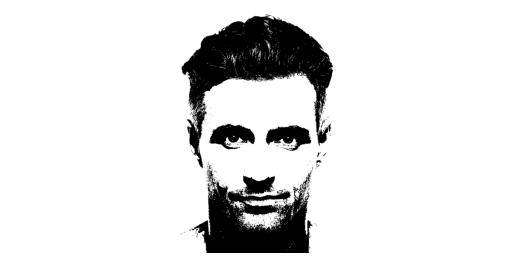

In [17]:
#defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


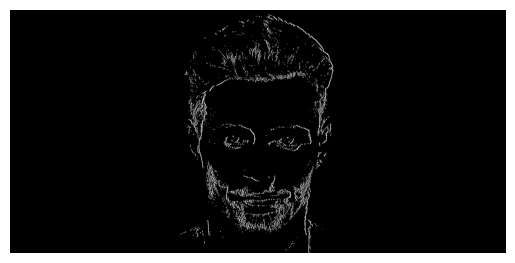

In [18]:
#defining a vertical edge detection kernel 
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


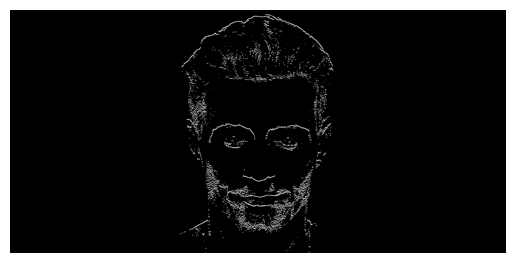

In [19]:
#defining an horizontal edge detection kernel 
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [21]:
### CONVOLUTION 
""" La convolution de f et g s'écrit f∗g, en désignant l'opérateur par le symbole ∗. 
Elle est définie comme l'intégrale du produit des deux fonctions après que l'une ait été réfléchie
autour de l'axe des y et décalée. En tant que telle, elle est un type particulier de transformée intégrale """

" La convolution de f et g s'écrit f∗g, en désignant l'opérateur par le symbole ∗. \nElle est définie comme l'intégrale du produit des deux fonctions après que l'une ait été réfléchie\nautour de l'axe des y et décalée. En tant que telle, elle est un type particulier de transformée intégrale "

In [22]:
#example
from scipy.ndimage import convolve
m = [[10, 10, 1],[10, 1, 1],[-10, 1, 1]]
k = [[10, 10, 10],[0, 0, 0],[-10, -10, -10]]

c= convolve(m, k , mode='constant', cval=0.0)
print('Matrix')
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in m]))

print('Kernel')
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in k]))

print('Convolution')
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in c]))

Matrix
  10  10   1
  10   1   1
 -10   1   1
Kernel
  10  10  10
   0   0   0
 -10 -10 -10
Convolution
 110 120  20
-290-290 -90
-110-120 -20


(3, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

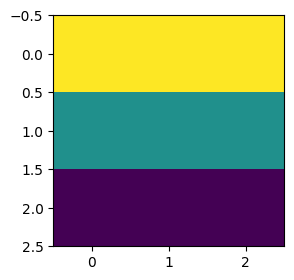

In [23]:
k2 = np.matrix(k)
f_min, f_max = k2.min(), k2.max()
filter = (k2 - f_min) / (f_max - f_min)
print(k2.shape)
fig= plt.figure(figsize=(3,3))
plt.imshow(k2)
plt.show

In [25]:
### Réseaux de neurones convolutionnels
"""On peut donc consdiérer un noyau comme un filtre appliqué à l'image pour en tirer des features.
Dans un réseau de neurones convolutionnels c'est le réseau qui va trouver lui même les filtres a appliquer aux images."""

"On peut donc consdiérer un noyau comme un filtre appliqué à l'image pour en tirer des features.\nDans un réseau de neurones convolutionnels c'est le réseau qui va trouver lui même les filtres a appliquer aux images."

In [30]:
#Import dataset
import pathlib
import os

data_dir = pathlib.Path('./assets/dataset1')
print(data_dir)
print(os.path.abspath(data_dir))

assets\dataset1
C:\Users\dalet\Labo_ia\assets\dataset1


In [31]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

22


In [35]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 22 files belonging to 2 classes.
Using 18 files for training.
Found 22 files belonging to 2 classes.
Using 4 files for validation.
['visage_femme', 'visage_homme']


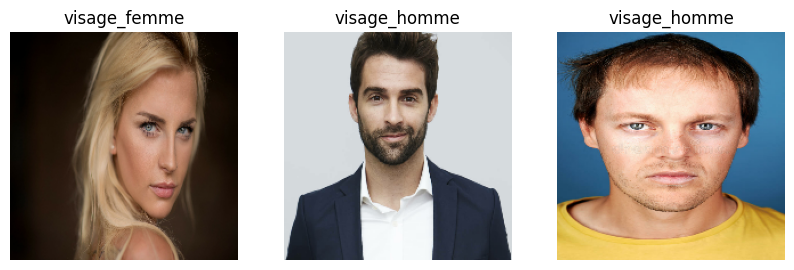

In [36]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [37]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


C:\Users\dalet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 5s 332ms/step - loss: 0.7608 - accuracy: 0.5556 - val_loss: 0.8061 - val_accuracy: 0.5000
Epoch 2/2
6/6 [==============================] - 2s 252ms/step - loss: 0.7064 - accuracy: 0.5000 - val_loss: 0.6979 - val_accuracy: 0.5000


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

In [48]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = model.predict_classes(img_to_predict)
    print(model.predict_classes(img_to_predict))
    print(model.predict(img_to_predict))
    if res == 1:
        plt.imshow(cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A MAN !")
    elif res == 0 :
        plt.imshow(cv2.cvtColor(image_face2, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A WOMAN !")

ModuleNotFoundError: No module named 'termios'